## ***3차시: 객체탐지 모델을 이용한 이미지 인식 실습***
- YOLO라는 모델을 이용해 이미지에 있는 객체들을 인식시켜봅니다
- 이를 위해 Ultralytics라는 프레임워크를 설치하여 사용합니다

### ***Ultralytics와 YOLO***
- 최초의 YOLO의 저자는 Joseph Redmon 입니다
  - https://arxiv.org/abs/1506.02640
  - 소스코드는 https://github.com/pjreddie/darknet 에 공개되어 있습니다
- 이후 YOLO의 원저자는 연구를 중단합니다
  - 이후 위 소스코드를 이어받아 YOLOv4까지 만듭니다
  - 소스코드는 https://github.com/AlexeyAB/darknet 에 공개되어 있습니다 
- YOLOv5부터는 Ultralytics라는 곳에서 만들어서 배포하고 있습니다
  - 소스코드는 https://github.com/ultralytics/ultralytics 에 공개되어 있습니다
  - 현재 v12까지 공개되어 있습니다
- 이후 YOLOv4의 공저자와 주저자가 YOLOv7을 다시 업데이트 합니다
  - 소스코드는 https://github.com/WongKinYiu/yolov7 에 공개되어 있습니다

#### ***종합***
- YOLOv1 ~ v4, v7
  - YOLO원저자와 이를 이어받은 연구자들이 만듬
  - C언어 기반
- YOLOv5: Ultralytics에서 만들어서 현재 v12까지 발표
  - Python언어 기반

#### ***우리의 실습 방향***
- Python언어 기반으로 사용할 수 있는 Ultralytics를 이용합니다
- YOLOv8 ~ v12까지 사용해봅니다


In [ ]:
! pip install ultralytics

### ***샘플 이미지 다운로드***
- 아래와 같은 방법으로 이미지 인식에 사용할 샘플 이미지를 다운로드 받아봅니다

In [11]:
import urllib.request
import zipfile
import os

url = "https://ultralytics.com/assets/coco128.zip"
save_path = "coco128.zip"

# url에 있는 파일을 다운로드
urllib.request.urlretrieve(url, save_path)

# 압축 해제
with zipfile.ZipFile(save_path, 'r') as zip_ref:
    zip_ref.extractall()

### ***Ultralytics를 이용한 각 버전별 테스트***
- 우리는 아래의 5가지 버전의 YOLO모델중 가장 가벼운 모델을 사용합니다
- 모델버전:파일이름은 아래와 같습니다
  - YOLOv8: yolov8n.pt
  - YOLOv9: yolov9t.pt
  - YOLOv10: yolov10n.pt
  - YOLOv11: yolo11n.pt
  - YOLOv12: yolo12n.pt
- pt 파일
  - 인공신경망을 구성하는 함수의 기울기와 y절편 입니다
  - 기울기를 가중치(weight), y절편을 편향(bias)라고 합니다
  - 그래서 y = wx + b 라는 함수의 거대한 조합으로 설계되어 있습니다
  - 그 조합이 얼마냐 거대하냐에 따라 끝에 n, s, m, l, x 등으로 나누어집니다
  - https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/models/12/yolo12.yaml
    - 위 파일에서 FLOPS로 검색해봅니다 (FLoating point Operation Per Second)
    - n모델이 가장 규모가 작음을 확인할 수 있습니다
    - 고가의 GPU가 없어도 CPU로 돌릴 수 있는 모델입니다
    - 우리는 각 YOLO 버전별로 가장 가벼운 모델을 사용하겠습니다
  ```
  scales: # model compound scaling constants, i.e. 'model=yolo12n.yaml' will call yolo12.yaml with scale 'n'
  # [depth, width, max_channels]
  n: [0.50, 0.25, 1024] # summary: 272 layers, 2,602,288 parameters, 2,602,272 gradients, 6.7 GFLOPs
  s: [0.50, 0.50, 1024] # summary: 272 layers, 9,284,096 parameters, 9,284,080 gradients, 21.7 GFLOPs
  m: [0.50, 1.00, 512] # summary: 292 layers, 20,199,168 parameters, 20,199,152 gradients, 68.1 GFLOPs
  l: [1.00, 1.00, 512] # summary: 488 layers, 26,450,784 parameters, 26,450,768 gradients, 89.7 GFLOPs
  x: [1.00, 1.50, 512] # summary: 488 layers, 59,210,784 parameters, 59,210,768 gradients, 200.3 GFLOPs
  ```


0: 416x640 4 persons, 1 baseball glove, 845.2ms
Speed: 2.9ms preprocess, 845.2ms inference, 5.8ms postprocess per image at shape (1, 3, 416, 640)


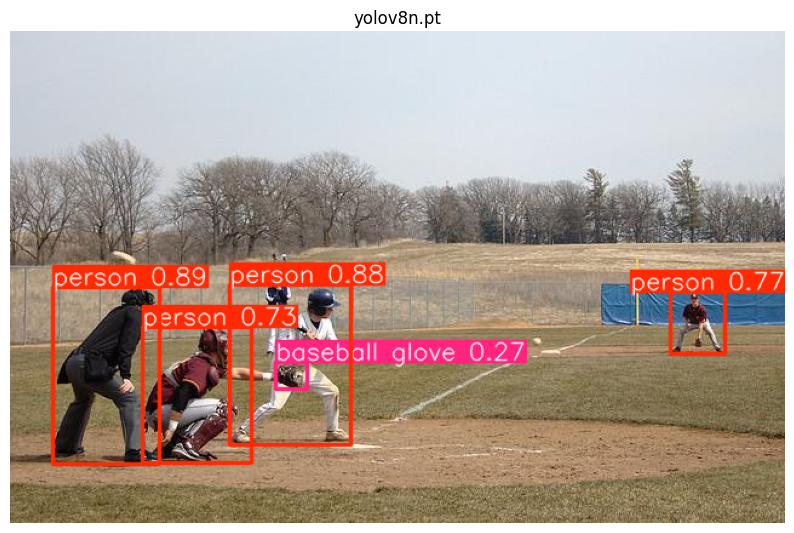


0: 416x640 4 persons, 1 sports ball, 502.2ms
Speed: 2.7ms preprocess, 502.2ms inference, 4.2ms postprocess per image at shape (1, 3, 416, 640)


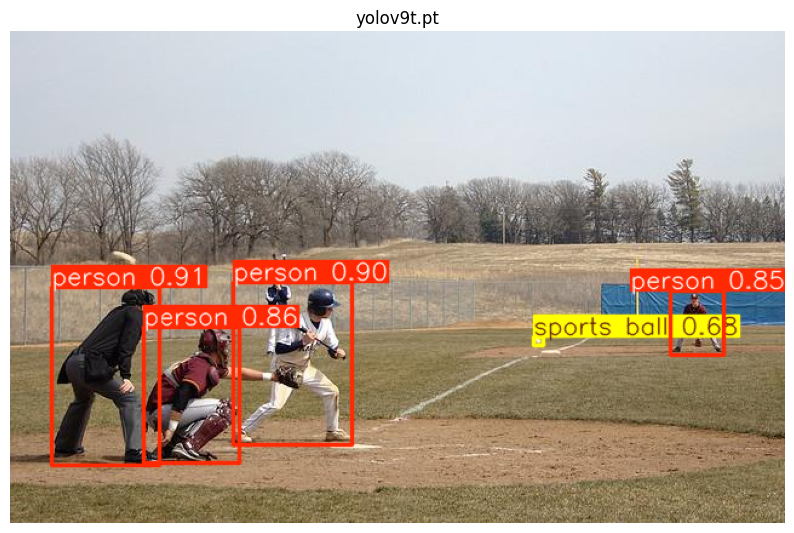


0: 416x640 4 persons, 1 baseball glove, 481.5ms
Speed: 3.9ms preprocess, 481.5ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)


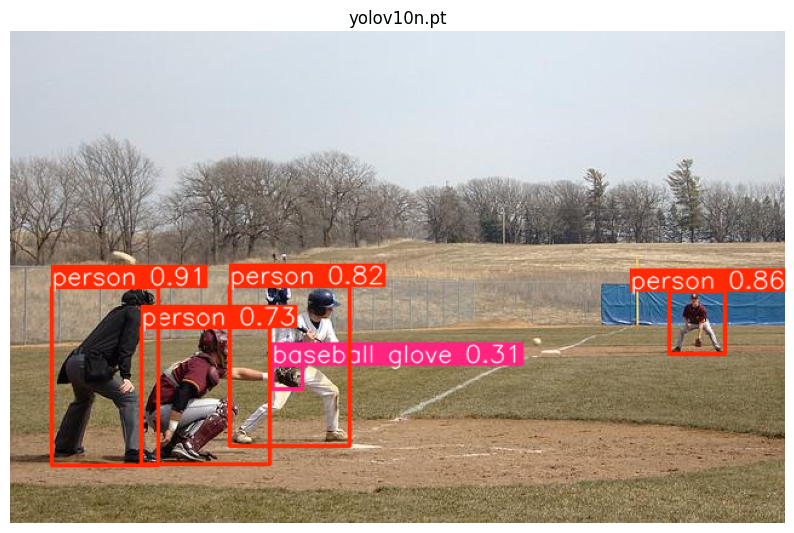


0: 416x640 4 persons, 1 sports ball, 1 baseball bat, 1 baseball glove, 574.1ms
Speed: 3.9ms preprocess, 574.1ms inference, 2.9ms postprocess per image at shape (1, 3, 416, 640)


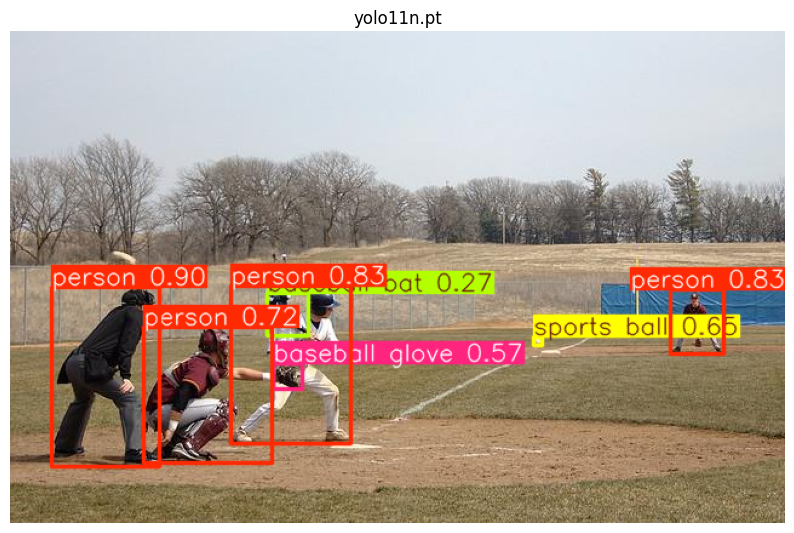


0: 416x640 4 persons, 1 sports ball, 665.0ms
Speed: 3.3ms preprocess, 665.0ms inference, 3.3ms postprocess per image at shape (1, 3, 416, 640)


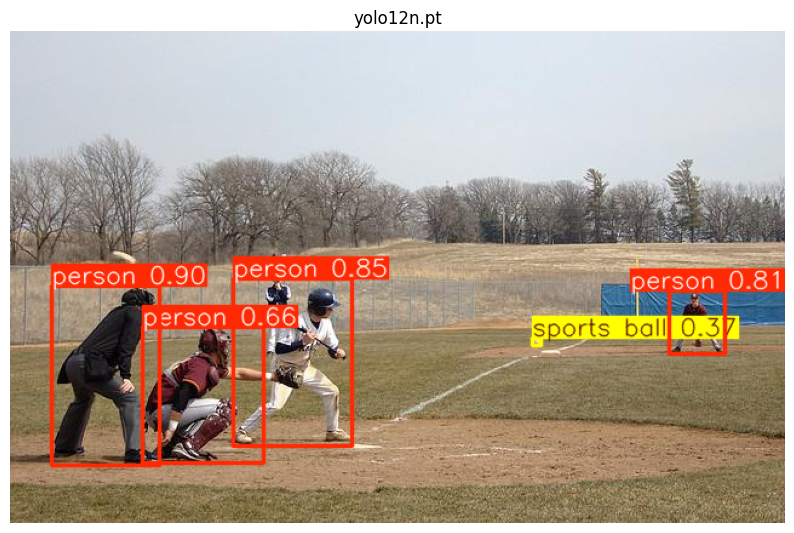

In [14]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 이번 시간에 사용할 YOLO 모델들 정의
models = [
    "yolov8n.pt",
    "yolov9t.pt",
    "yolov10n.pt",
    "yolo11n.pt",
    "yolo12n.pt"
]

########################################
# 파일명을 바꾸면서 여러번 테스트를 해봅시다 #
########################################
filename = r"coco128\images\train2017\000000000488.jpg"

# 이미지 불러오기
img = cv2.imread(filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 각 모델별 추론 실행
for weight in models:
    model = YOLO(weight)        # 모델 불러오기
    results = model(img_rgb)    # 추론
    
    # 결과 시각화
    res_plotted = results[0].plot()  # 결과 그리기
    plt.figure(figsize=(10, 7))
    plt.imshow(res_plotted)
    plt.axis("off")
    plt.title(weight)
    plt.show()


### ***인식 결과 생각해보기***
- 사람 1명은 모든 모델에서 인식되지 않았습니다
- sports ball, baseball glove는 몇몇 모델에서 인식되지 않았습니다
- baseball bat은 단 하나의 모델에서만 인식되었습니다
- 최신의 모델이 항상 모든 이미지에 대해 인식을 잘 하는 것은 아니었습니다

#### ***객체 탐지 모델의 성능 평가 지표***
##### 속도
  - 1장의 이미지를 인식하는 속도
  - 큰 이미지와 작은 이미지에 대해 인식 속도 차이가 있지 않은가 하는 의문이 발생할 수 있습니다
  - 우리는 2차시에서 이미지를 인식할 때 28x28로 변환 후 인식했습니다
  - 따라서 이미지를 리사이징 하는 시간을 제외하고는 이 차이는 발생하지 않습니다

##### 인식률
- ***TP / FP / FN / TN***
  - 아래와 같은 이유로 TN은 Precision/Recall 지표에서는 사용하지 않습니다

| 용어 | 의미 | 예시 (고양이 탐지 모델) |
|------|------|--------------------------|
| **TP (True Positive)** | 객체가 실제로 존재하고, 올바르게 검출함 | 고양이를 고양이라고 탐지 |
| **FP (False Positive)** | 객체가 없는데 있다고 잘못 탐지 | 강아지를 고양이라고 탐지 |
| **FN (False Negative)** | 객체가 있는데 놓침 | 고양이가 있는데 탐지 못함 |
| **TN (True Negative)** | 객체가 없고, 없는 걸로 맞게 처리 | 강아지가 없어서 없다고 함 |

- **Precision / Recall / mAP**

| 지표 | 의미 | 계산 방법 | 장점 | 단점 |
|------|------|-----------|------|------|
| **Precision** | 검출 결과 중 올바른 검출 비율 | TP / (TP + FP) | 오인식(False Positive)에 민감 | 미인식(FN)은 반영 못함 |
| **Recall** | 실제 객체 중 올바르게 검출한 비율 | TP / (TP + FN) | 미인식(False Negative)에 민감 | 오인식(FP)은 반영 못함 |
| **AP (Average Precision)** | Precision-Recall 곡선의 면적 | PR Curve 아래 면적 | Precision과 Recall을 종합 | 클래스 불균형에 영향을 받을 수 있음 |
| **mAP (mean Average Precision)** | 클래스별 AP의 평균 | Σ(AP of i) / N | 클래스 불균형에 영향 받지 않음 | 계산이 복잡 |

  - **mAP 상세 설명**
    - 클래스별 Average Precision의 평균
    - `데이터 분포에 치우치지 않고 클래스별 성능을 균등하게 반영하기 위한 지표` 입니다
      - 테스트 데이터에 baseball glove는 2개, 사람은 10명이 있다고 가정합니다
      - baseball glove는 전혀 인식하지 못했지만 사람은 모두 인식하면 12분의 10을 인식한 것이 됩니다
      - 그러나 mAP에서는 아래와 같이 봅니다 (간단한 예시)

| 클래스 | 실제 개수 | 검출 성공 | Precision / Recall | AP |
|--------|-----------|-----------|------------------|----|
| 사람   | 10        | 10        | 100% / 100%      | 100% |
| 글러브 | 2         | 0         | 0% / 0%          | 0% |

#### ***모델별 성능 평가 결과 확인***
- 아래의 URL에서 각 모델의 성능 평가 결과를 확인해봅니다
  - YOLOv4: https://github.com/AlexeyAB/darknet/tree/yolov4
  - YOLOv7: https://github.com/AlexeyAB/darknet
  - YOLOv12: https://github.com/ultralytics/ultralytics
- COCO
  - 테스트 데이터의 이름입니다
  - 테스트 결과를 비교하려면 동일한 데이터로 테스트 해야 합니다